In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from google.colab import files
uploaded=files.upload()

Saving sample2.csv to sample2 (2).csv


In [49]:
new_df=pd.read_csv("sample2.csv")

In [50]:
new_df

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [51]:
new_df.drop("Unnamed: 0",axis=1,inplace=True)

In [52]:
new_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

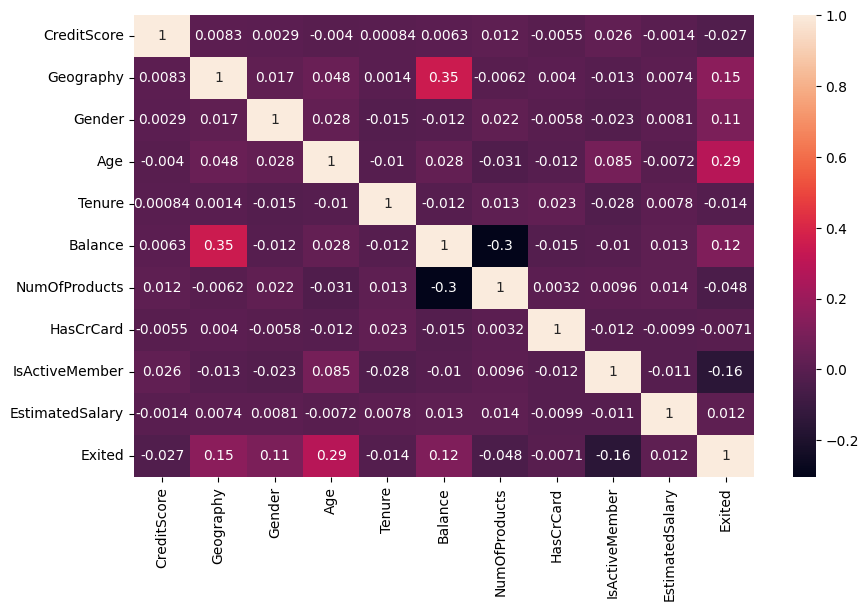

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(),annot=True)

In [53]:
xdata=new_df.drop("Exited",axis=1)

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
oversample=SMOTE()
x,y=oversample.fit_resample(xdata,new_df['Exited'])

In [56]:
x.shape

(15926, 10)

In [57]:
y.shape

(15926,)

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [59]:
df=new_df

In [60]:
X=df.drop('Exited', axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [65]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_res.shape}")

Original training set shape: (6500, 10)
Resampled training set shape: (10320, 10)


In [66]:
rf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

In [67]:
rf.fit(X_train_res, y_train_res)
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(n_estimators=300, random_state=42)

In [68]:
threshold = 0.35

In [69]:
def evaluate_model(model, name):
    y_proba = model.predict_proba(X_test)[:,1]
    y_pred_adj = (y_proba >= threshold).astype(int)

    print(f"\n{name} (Threshold = {threshold})")
    print("Accuracy:", accuracy_score(y_test, y_pred_adj))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adj))
    print(classification_report(y_test, y_pred_adj))

evaluate_model(rf, "Random Forest")
evaluate_model(gb, "Gradient Boosting")


Random Forest (Threshold = 0.35)
Accuracy: 0.73
Confusion Matrix:
 [[2023  780]
 [ 165  532]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2803
           1       0.41      0.76      0.53       697

    accuracy                           0.73      3500
   macro avg       0.67      0.74      0.67      3500
weighted avg       0.82      0.73      0.75      3500


Gradient Boosting (Threshold = 0.35)
Accuracy: 0.7314285714285714
Confusion Matrix:
 [[2023  780]
 [ 160  537]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      2803
           1       0.41      0.77      0.53       697

    accuracy                           0.73      3500
   macro avg       0.67      0.75      0.67      3500
weighted avg       0.82      0.73      0.76      3500

